# Kan vi gjøre GPT-2 til en overbevisende poet?
## Prosjekt 2 i HON2200 - mai 2021
### Theodor O. Aaberge, Benedicte Beldam, Simon Halstensen og Gulla Torvund

Vi trener språkmodellen GPT-2 på store samlinger med dikt og undersøker om den blir mer "poetisk". For å teste om modellen vår faktisk kan gå for å være en dikter, utfører vi en Turing-test på venner og bekjente. Vi finner klare indikasjoner på at mennesker ikke klarer å skille mellom genererte og ikke-genererte dikt.

## Innledning

Et område innenfor maskinlæring som har hatt særlig framgang de seneste årene, er tekstgenering. Språkmodellen GPT-2, utviklet av OpenAI, er lansert med åpen kildekode slik at den som måtte ønske det, kan bruke den til å blant annet generere tekst. Man kan også trene modellen videre slik at den blir bedre på å generere tekst innen visse felt eller tema, som for eksempel poesi. 

I denne rapporten undersøker vi om det er mulig å differensiere mellom generert og menneske-skrevne dikt, og i den tilhørende etikk-teksten diskuteres det om hvorvidt genererte dikt har meningsinnhold. Vi vil først introdusere modellen og dataen vi bruker, før vi viser hvordan vi trener den. Deretter legger vi frem resultatene fra Turing-testen vår. Vi diskuterer betydingen av resultatene og eventuelle feilkilder i undersøkelsen vår, for så å konkludere.

## Metode: modellen og dataen vi bruker

Som foreslått i oppgaveteksen, brukte vi modellen i Python-biblioteket aitextgen. Til trening brukte vi datasettene:

- [Complete poetryfoundation.org dataset](https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset)
- [Poems from poetryfoundation.org](https://www.kaggle.com/ultrajack/modern-renaissance-poetry)

I treningen spesifiserte vi en læringsrate på $10^{-5}$. 

Etter å ha trent valgte vi ut tre dikt som modellen produserte. Dette var i stor grad kirsebærplukking av dikt vi selv synes var gode. Disse tre diktene, sammen med tre dikt som gruppen hadde skrevet, ble sendt ut til rundt 19 personer. De som ble tilsendt dikt skulle gi tilbakemelding på hvilke tre dikt de trodde var generert av modellen. I tillegg fikk vi dem til å rangere diktene etter hvem de likte best.

Følgende dikt utgjorde samlingen vi sendte ut:

##### Dikt 1 (generert)
All the mountains: <br>
The clouds, <br>
The wind, the hills, the sky. <br>
<br>
At the end of the day,<br>
I want to be certain<br>
That I won’t be left alone.

##### Dikt 2
In. Hindsight, laying on my back. Tie the brightest, most furious, <br>
Nicest hair. Linen fabric stretched, turned the ties. Aired. <br>
Bare belly. Whole nut, ham. Shared the wound.

##### Dikt 3
body receiving this pdf will place printed out mail in its pocket after exhibition. <br>
body receiving this pdf will take a table from an exhibition space back to original position. <br>
body receiving this pdf will exit exhibition space. body receiving this pdf will walk to a waterfall. <br>
body receiving this pdf will let printed out mail from pocket fall in a waterfall. <br>
body receiving this pdf will watch how printed out mail travels down the river until it is out of sight.

##### Dikt 4 (generert)
Now I can see you <br>
In my hand, and in your eyes <br>
It is the same <br>
In every corner <br>
And there are no other ways <br>
To express it, <br>
To say it.

##### Dikt 5 (generert)
In the night, <br>
the morning <br>
I find myself <br>
dressed in a blanket <br>
and <br>
with my shirt <br>
on my lap, <br>
I feel <br>
I am in <br>
the dream. 

##### Dikt 6
Oh night of fears, you came so sudden <br>
Your dark and awful face covering the earth <br>
No light could brighten, no man could bear


## Resultater: genererte dikt versus dikt skrevet av mennesker

Vi sendte ut et skjema til venner og bekjente (se [Utsendt_undersøkelse](../Data/Utsendt_undersøkelse.docx) i Data-mappen) og plotter resultatene nedenfor. Vi fikk inn 20 svar.

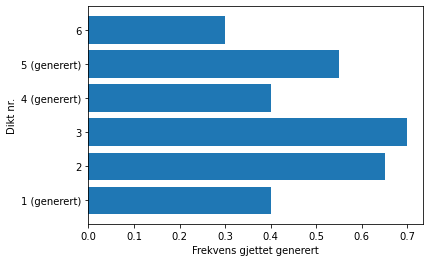

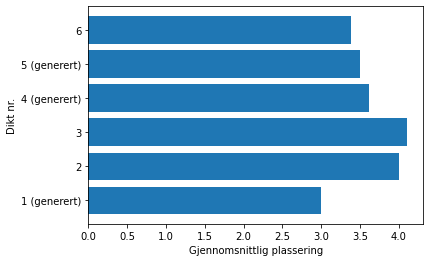

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rank1 = [2,2,4,2,1,6,4,2,1,4,6,4,4,2,1,2,3,4]
rank2 = [6,1,2,3,2,4,6,5,5,5,2,6,1,3,5,6,5,5]
rank3 = [1,6,1,1,3,2,6,6,6,6,1,5,6,1,6,5,6,6]
rank4 = [5,3,5,6,6,5,5,3,2,1,4,2,3,4,2,4,4,1]
rank5 = [4,5,4,5,5,3,4,4,3,3,3,3,2,5,4,2,1,3]
rank6 = [3,4,5,4,4,5,4,1,4,2,5,1,5,6,3,1,2,2]


guessed = np.array([8, 13, 14, 8, 11, 6])
n = sum(guessed) / 3
guessed_norm = guessed / n

avg_rank = [np.mean(rank1),
           np.mean(rank2),
           np.mean(rank3),
           np.mean(rank4),
           np.mean(rank5),
           np.mean(rank6)]

buckets = ["1 (generert)", "2", "3", "4 (generert)", "5 (generert)", "6"]

plt.barh(buckets, guessed_norm)
plt.ylabel("Dikt nr.")
plt.xlabel("Frekvens av gjettet generert dikt")
plt.show()
plt.barh(buckets, avg_rank)
plt.ylabel("Dikt nr.")
plt.xlabel("Gjennomsnittlig plassering (1 er best)")
plt.show()


## Diskusjon

Resultatene tyder på at det ikke er lett å skille mellom genererte og ikke-genererte dikt og at mennesker generelt ikke er  særlig mer tilbøyelig til å like noen bedre enn andre. Likevel er det mange faktorer og feilkilder som spiller inn og gjør resultatene mindre troverdige.

For det første har vi kun mottatt rundt tjue tilbakemeldinger på undersøkelsen. Dette er ikke et særlig representativt utvalg av befolkningen, og dermed kan vi ikke med sikkerhet stole på resultatet. I tillegg valgte vi dikt som ikke var veldig tradisjonelle, slik at de genererte diktene ikke ville skille seg tydelig fra de menneske-skrevne. Så det kan hende at resultatene våre kun gjelder når man sammenlikner genererte dikt med modernistiske dikt. Som nevnt har vi også kirsebærplukket de genererte diktene, så det må poengteres at langt fra alle diktene som den trente GPT-2-modellen genererer, er "bra nok" til å bestå Turing-testen. 

Man kan argumentere for at enhver modell som generer tekst vil produsere troverdig materiale om man gir den nok forsøk. Dette er beskrevet i setningen om uendelig mange aper, som slår fast at en ape som taster på en skrivemaskin i uendelig lang tid vil produsere nærmest enhver gitt tekst [[1](https://no.wikipedia.org/wiki/Setningen_om_uendelig_mange_aper)]. Vi mener dog at det praktiske fungerer som en motvekt her, i den forstand at vi hadde begrenset med tid og tålmodighet til å velge ut gode tekster. Tekstene vi har plukket ut må derfor til noen grad reflektere hvor god modellen faktisk er.

Samtidig trente vi modellen vår på ganske lite data. Det kan hende at den hadde blitt langt bedre med mer og bedre trening.

## Konklusjon

Undersøkelsen vår viser at de 19 personene som ble spurt om å klassifisere ikke-genererte og genererte dikt, samt rangere dem etter hvilke tekster de syntes var best ("traff dem mest"), ikke skilte tydelig mellom menneskeskapte og algoritmeskapte dikt. Selv om dette var en undersøkelse med svært mange svakheter og feilkilder, trekker vi konklusjonen om at det er fullt mulig å skape en poetisk GPT-2-modell.

## Referanser

1. https://no.wikipedia.org/wiki/Setningen_om_uendelig_mange_aper